In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc

In [2]:
def get_difference_data(file1,file2,var,multiplier):
#file 1 is forcing file, file2 is reference
    dsFOR = xr.open_dataset(file1)
    dsCT = xr.open_dataset(file2)
    VAR_FOR = np.array(dsFOR[var])*multiplier
    VAR_CT = np.array(dsCT[var])*multiplier
    changeVAR = np.nanmean(VAR_FOR[:,:,:],axis=0) - np.nanmean(VAR_CT[:,:,:],axis=0)
    return changeVAR

In [3]:
ch4file = '/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.ch4_perturbation.cam.h0.000101-000912.nc'
controlfile = '/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.project_preindustrial.cam.h0.0001-0010.nc'

In [8]:
changeTREFHT = get_difference_data(ch4file,controlfile,'TREFHT',1)
changeTMQ = get_difference_data(ch4file,controlfile,'TMQ',1000)
changeCLD = get_difference_data(ch4file,controlfile,'CLDTOT',1)
changeICEF = get_difference_data(ch4file,controlfile,"ICEFRAC",1)
changePRECT = get_difference_data(ch4file,controlfile,'PRECT',1000*86400)


In [9]:
lat = np.linspace(-90,90,96)
lon = np.linspace(0,360,144)

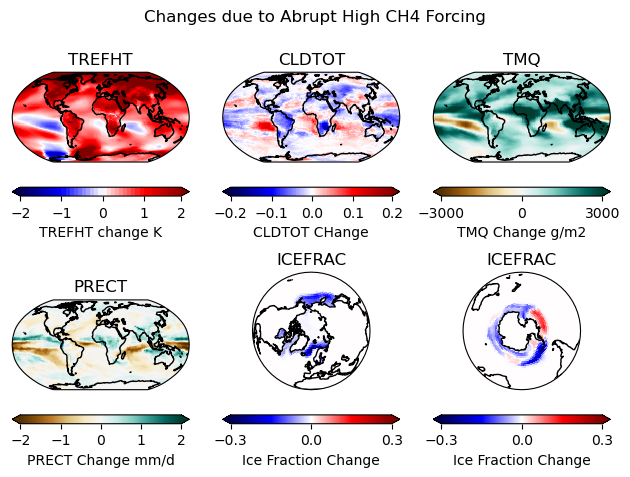

In [32]:
fig = plt.figure()

ax1=fig.add_subplot(2,3,1,projection=ccrs.Robinson(central_longitude=0, globe=None))
bounds1 = np.arange(-2,2,.1)
ax1.coastlines()
a = plt.pcolormesh(lon,lat,changeTREFHT,transform = ccrs.PlateCarree(),cmap='seismic',vmin=-2,vmax=2)
cbar1 = plt.colorbar(a,label='TREFHT change K', orientation="horizontal",extend = 'both',ax=ax1,drawedges=False,boundaries = bounds1)
cbar1.set_ticks([-2,-1,0,1,2])
#cbar1.set_ticklabels(["A", "B", "C", "D"])
plt.title('TREFHT') 
plt.tight_layout()

ax2 = fig.add_subplot(2,3,2,projection=ccrs.Robinson(central_longitude=0, globe=None))
bounds2 = np.arange(-.2,.2,.005)
ax2.coastlines()
b = plt.pcolormesh(lon,lat,changeCLD,transform = ccrs.PlateCarree(),cmap='seismic',vmin=-.2,vmax=.2)
cbar2 = plt.colorbar(b,label='CLDTOT CHange', orientation="horizontal",extend = 'both',ax=ax2,drawedges=False,boundaries = bounds2)
cbar2.set_ticks([-.2,-.1,0,.1,.2])
plt.title('CLDTOT')
plt.tight_layout()

ax3 = fig.add_subplot(2,3,3,projection=ccrs.Robinson(central_longitude=0, globe=None))
bounds3 = np.arange(-3000,3000,1)
ax3.coastlines()
c = plt.pcolormesh(lon,lat,changeTMQ,transform = ccrs.PlateCarree(),cmap='BrBG',vmin=-3000,vmax=3000)
cbar3 = plt.colorbar(c,label='TMQ Change g/m2', orientation="horizontal",extend = 'both',ax=ax3,drawedges=False,boundaries = bounds3)
cbar3.set_ticks([-3000,0,3000])
plt.title('TMQ')
plt.tight_layout()

ax4 = fig.add_subplot(2,3,4,projection=ccrs.Robinson(central_longitude=0, globe=None))
bounds4 = np.arange(-2,2,.01)
ax4.coastlines()
d = plt.pcolormesh(lon,lat,changePRECT,transform = ccrs.PlateCarree(),cmap='BrBG',vmin=-2,vmax=2)
cbar4 = plt.colorbar(d,label='PRECT Change mm/d', orientation="horizontal",extend = 'both',ax=ax4,drawedges=False,boundaries = bounds4)
cbar4.set_ticks([-2,-1,0,1,2])
plt.title('PRECT')
plt.tight_layout()

ax5 = fig.add_subplot(2,3,5,projection=ccrs.Orthographic(0,90))
bounds5 = np.arange(-.3,.3,.001)
ax5.coastlines()
e = plt.pcolormesh(lon,lat,changeICEF,transform = ccrs.PlateCarree(),cmap='seismic',vmin=-.3,vmax=.3)
cbar5 = plt.colorbar(e,label='Ice Fraction Change', orientation="horizontal",extend = 'both',ax=ax5,drawedges=False,boundaries = bounds5)
cbar5.set_ticks([-.3,0,.3])
plt.title('ICEFRAC')

plt.tight_layout()

ax6 = fig.add_subplot(2,3,6,projection=ccrs.Orthographic(180,-90))
bounds6 = np.arange(-.3,.3,.001)
ax6.coastlines()
f = plt.pcolormesh(lon,lat,changeICEF,transform = ccrs.PlateCarree(),cmap='seismic',vmin=-.3,vmax=.3)
cbar6 = plt.colorbar(f,label='Ice Fraction Change', orientation="horizontal",extend = 'both',ax=ax6,drawedges=False,boundaries = bounds6)
cbar6.set_ticks([-.3,0,.3])
plt.title('ICEFRAC')
plt.suptitle("Changes due to Abrupt High CH4 Forcing")
plt.tight_layout()
#plt.suptitle("Changes due to Abrupt High CH4 Forcing")

plt.savefig("final_subplots.png")








In [20]:
changeICEF.max()

0.1396712